In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-movies-and-shows-dataset/netflix_data.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('/kaggle/input/netflix-movies-and-shows-dataset/netflix_data.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# How many tv shows and movies?

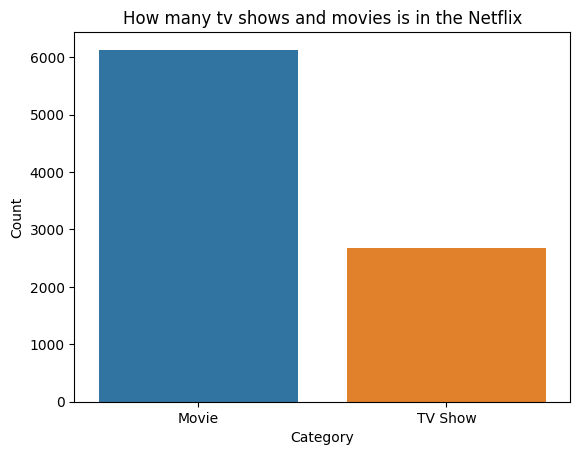

In [4]:
category_counts= df['type'].value_counts()
sns.barplot(x=category_counts.index, y = category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('How many tv shows and movies is in the Netflix')
plt.show()


About 2/3 is movies and 1/3 is tv shows
makes sense movies dont take as long as tv shows to make and movies are easier to watch and can be viewed in one sitting.

# Whos the most featured actor?

In [5]:
actor_list = df['cast'].str.split(',').explode()
actor_counts = actor_list.value_counts()
print(actor_counts)

cast
 Anupam Kher              39
 Rupa Bhimani             31
 Takahiro Sakurai         30
 Julie Tejwani            28
 Om Puri                  27
                          ..
 Vedika                    1
 Tedros Teclebrhan         1
 Maryam Zaree              1
 Melanie Straub            1
 Chittaranjan Tripathy     1
Name: count, Length: 39296, dtype: int64


I looked up the first three actors and two of them were indian actors and the third being a japanese voice actor infamous for anime shows, so I wonder two things is this a Indian Netflix dataset and what would the movie actors be like?

# Whos the most featured movie actor?

In [6]:
movies_df = df[df['type'] == 'Movie']
movie_actor_list = movies_df['cast'].str.split(',').explode()

# Remove any leading/trailing whitespace that might be present after splitting
movie_actor_list = movie_actor_list.str.strip()

# Count the occurrences of each actor
movie_actor_counts = movie_actor_list.value_counts()

# Display the result
print(movie_actor_counts)


cast
Anupam Kher              42
Shah Rukh Khan           35
Naseeruddin Shah         32
Akshay Kumar             30
Om Puri                  30
                         ..
Sushma Bakshi             1
Yusuf Hussain             1
Amarjeet Amle             1
Priya                     1
Chittaranjan Tripathy     1
Name: count, Length: 25951, dtype: int64


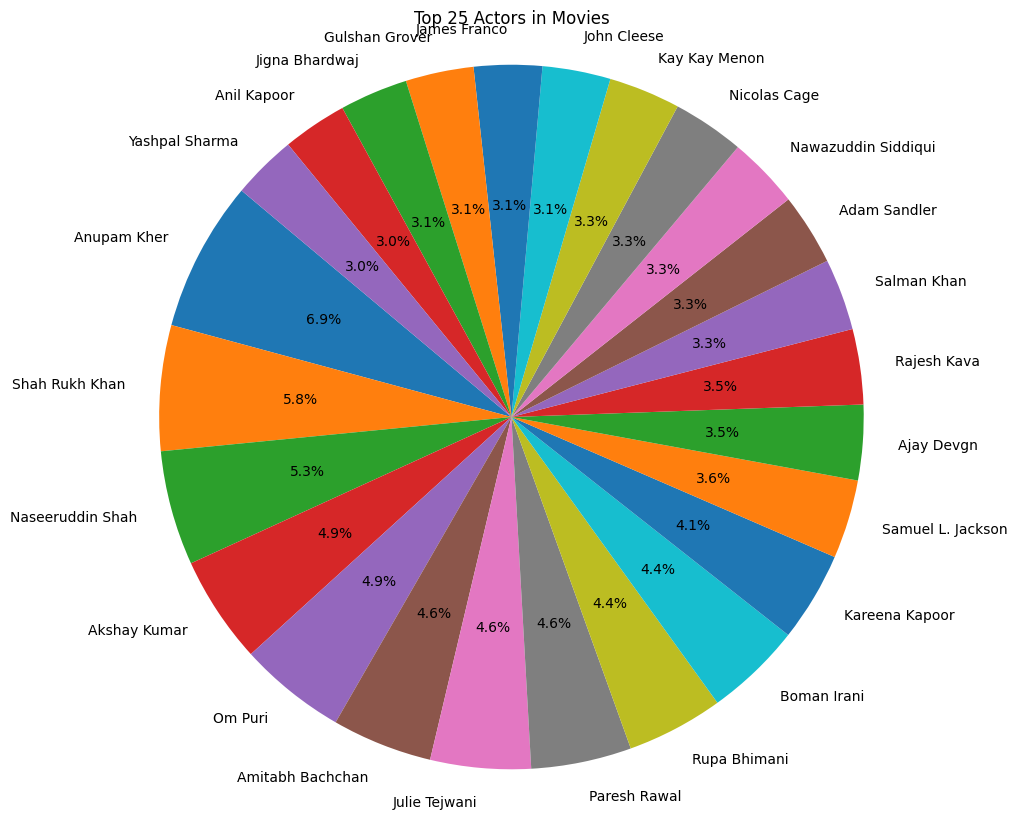

In [7]:
# graphing the top 25
top_25_actors = movie_actor_counts.head(25)
plt.figure(figsize=(10,10))
plt.pie(top_25_actors, labels=top_25_actors.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 25 Actors in Movies')
plt.show()

I dont recognize really any of these actors except Samuel L jackson, Nicolas Cage, and Adam Sandler. I wonder what movies they have on this dataset of them

In [8]:
# See what movies they have of the actors I know
actors = ["Adam Sandler", "Samuel L. Jackson", "Nicolas Cage"]

# Create a filtered DataFrame for each actor
for actor in actors:
    filtered_df = df[df['cast'].str.contains(actor, na=False)]
    print(f"Movies with {actor}:")
    print(filtered_df['title'])
    print("\n")


Movies with Adam Sandler:
27                                      Grown Ups
1879                              Hubie Halloween
2471                                   Uncut Gems
3753                               Murder Mystery
4482                      ADAM SANDLER 100% FRESH
4912                                  The Week Of
5227    The Meyerowitz Stories (New and Selected)
5533                                 Sandy Wexler
5846                                  The Do-Over
5879                             The Ridiculous 6
6018                               50 First Dates
6164                             Anger Management
6271                              Bedtime Stories
6303                                    Big Daddy
6497                                        Click
7008        Hotel Transylvania 3: Summer Vacation
7316                                 Little Nicky
7517                                    Mr. Deeds
8554                                 The Waterboy
8790                You 

# What country are they in?

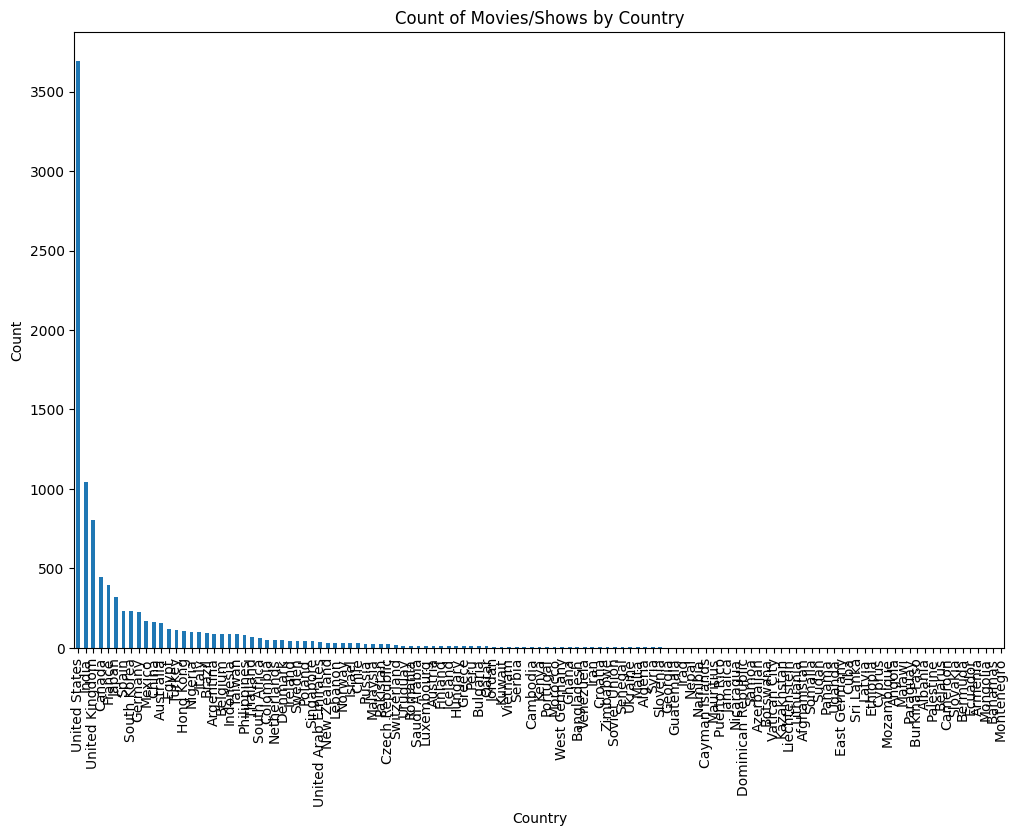

In [9]:

# Split the 'country' column on commas and create a separate row for each country
country_list = df['country'].str.split(',').explode()

# Remove any leading/trailing whitespace
country_list = country_list.str.strip()

# Count the occurrences of each country
country_counts = country_list.value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Movies/Shows by Country')

# Show the plot
plt.show()


## A lot of countries scale it back to the top 15 countrs since I see a build up

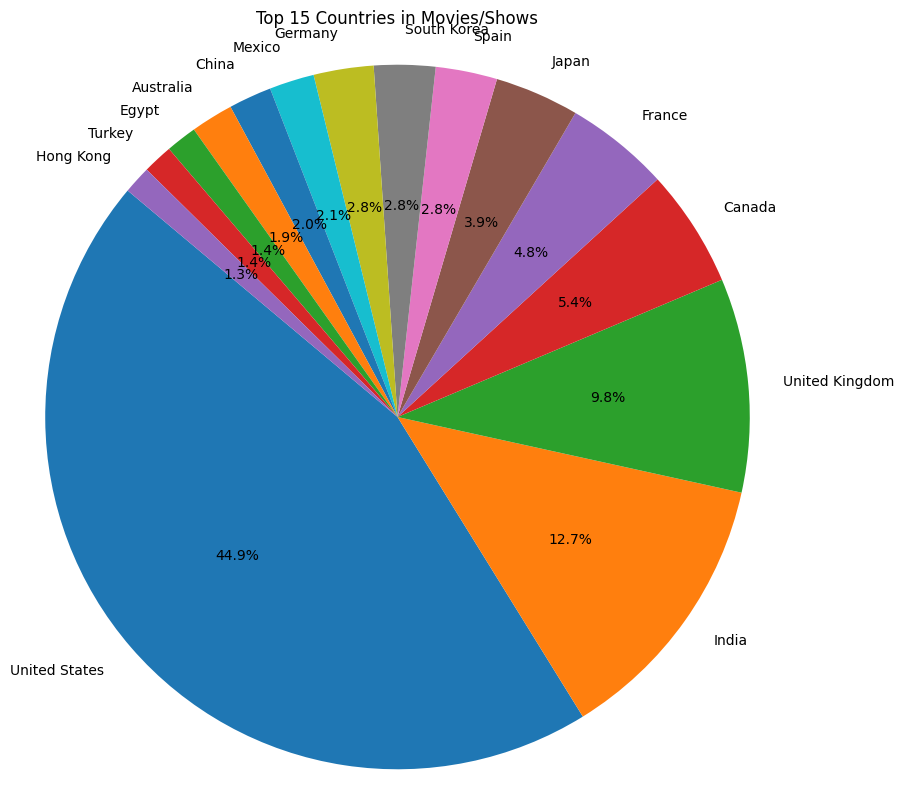

In [10]:
top_15_countries = country_counts.head(15)
plt.figure(figsize=(10, 10))
plt.pie(top_15_countries, labels=top_15_countries.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 15 Countries in Movies/Shows')
plt.show()

interesting there is majority of movies from the United States, so I wonder if the concentration of actors in india is higher then the concentration of actors in the United States

# Who are the top actors in United State films

In [11]:
# filter for rows where 'country' contains United States
us_movies= df[df['country'].str.contains('United States',na = False)]
# break up array and create a list based on the us movie
us_actor_list = us_movies['cast'].str.strip(',').explode()
us_actor_counts = us_actor_list.value_counts()
print("Top Actors in the United States Movies/Shows")
print(us_actor_counts.head(15))

Top Actors in the United States Movies/Shows
cast
David Attenborough    10
Jeff Dunham            7
Kevin Hart             6
Samuel West            6
Craig Sechler          6
Jim Gaffigan           5
Bill Burr              5
Jay O. Sanders         4
Sam Kinison            4
Dave Chappelle         4
Iliza Shlesinger       4
Tom Segura             4
Mike Birbiglia         4
Jerry Seinfeld         4
John Mulaney           3
Name: count, dtype: int64


In [12]:
# David Attenborough movies titles
david_films = df[df['cast'].str.contains('David Attenborough', na = False)]
us_actor_list = david_films['title'].tolist()
print("Titles featuring David Attenborough")
for title in us_actor_list:
    print(title)

Titles featuring David Attenborough
Breaking Boundaries: The Science Of Our Planet
Life in Color with David Attenborough
David Attenborough: A Life on Our Planet
Our Planet - Behind The Scenes
Our Planet
Africa
Blue Planet II
Frozen Planet
Frozen Planet: On Thin Ice
Frozen Planet: The Epic Journey
Life on Location
Life Story
Nature: Raising the Dinosaur Giant
Nature's Great Events (2009)
Nature's Great Events: Diaries
Planet Earth II
Planet Earth: The Complete Collection
The Blue Planet: A Natural History of the Oceans
The Hunt
The Making of Frozen Planet


David Attenborough has a lot due to his narration versus other us actors it could be easier to make for him.

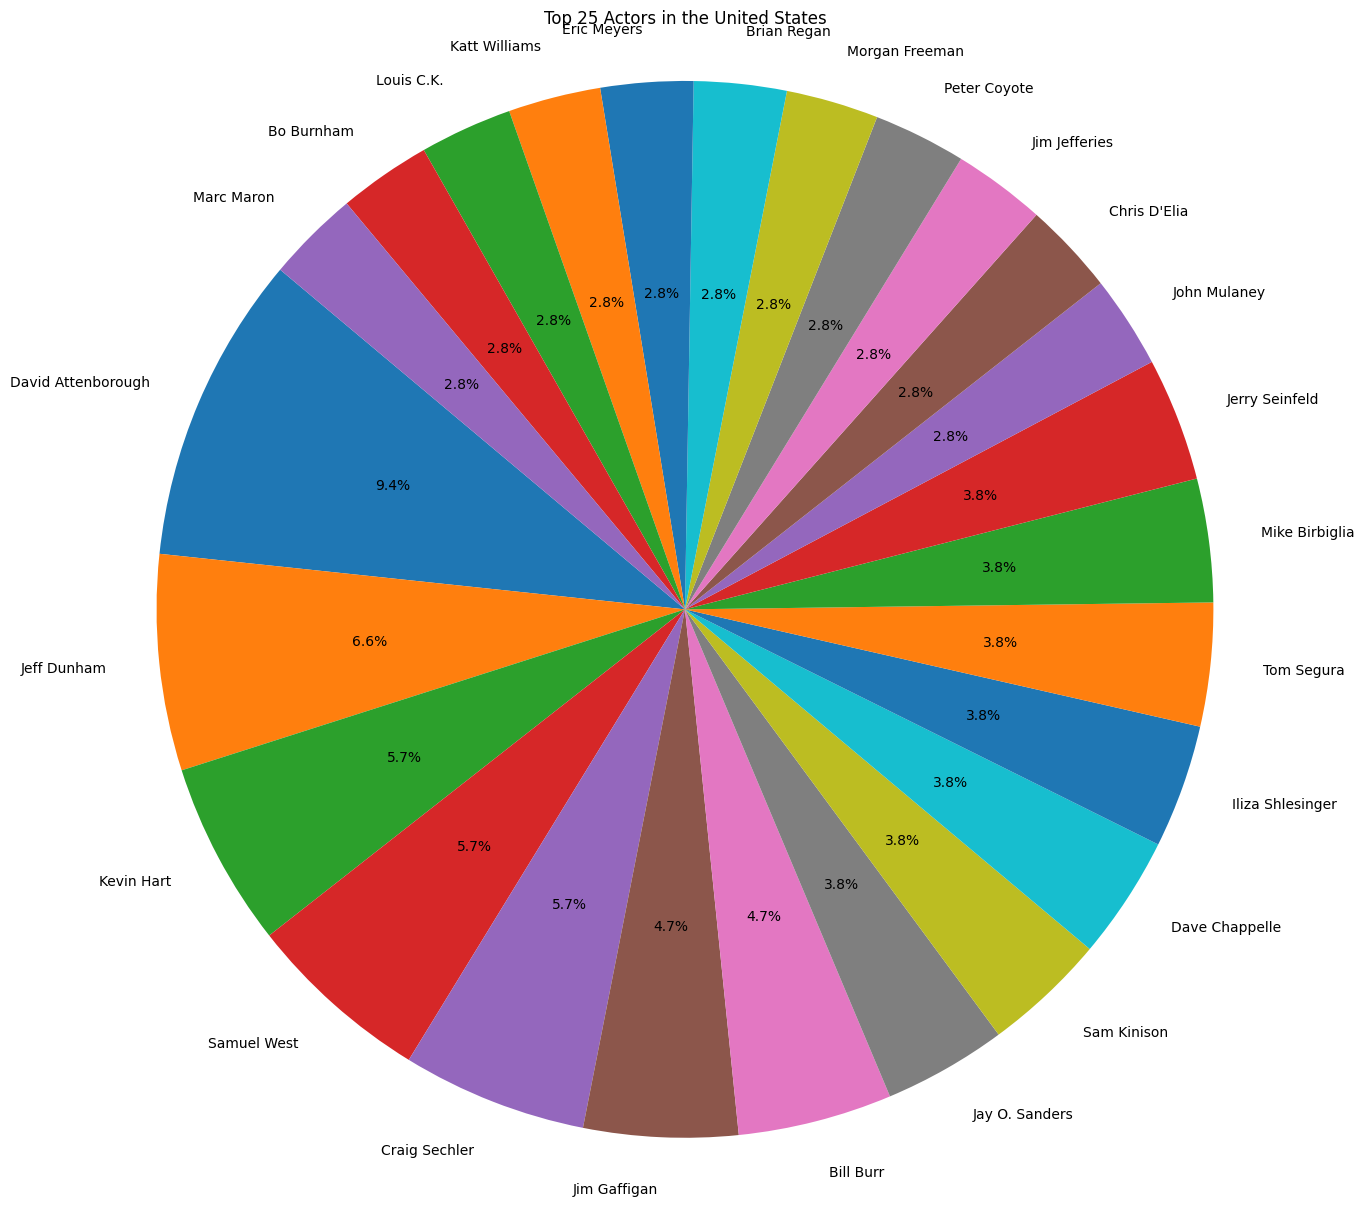

In [13]:
# graphing the top 25
top_25_us_actors = us_actor_counts.head(25)
plt.figure(figsize=(15,15))
plt.pie(top_25_us_actors, labels=top_25_us_actors.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 25 Actors in the United States')
plt.show()